In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, label_binarize
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


In [224]:
train_data = pd.read_csv(r"C:\Users\aless\OneDrive\Desktop\DM_2\datasets\train_tabular.csv")
test_data  = pd.read_csv(r"C:\Users\aless\OneDrive\Desktop\DM_2\datasets\test_tabular.csv")

In [225]:
# Drop the 'Unnamed: 0' column if it exists
train_data.drop(columns='Unnamed: 0', inplace=True, errors='ignore')
test_data.drop(columns='Unnamed: 0', inplace=True, errors='ignore')

# Define the target variable
target = "rating"

# 2. Extract numerical columns dynamically from the training set
attributes = list(np.unique(train_data.select_dtypes(include=['int', 'float64']).columns))

# 3. Remove unwanted one-hot encoded columns and any other non-useful features
unwanted_values = {'rating','averageRating'}
attributes = [attr for attr in attributes if attr not in unwanted_values]
print("Initial numerical features:", attributes)

mapping = {
    0: '<=3', 
    1: '<=3',
    2: '<=3', 
    3: '<=3', 
    4:'4',
    5:'5',
    6: '6', 
    7:'7',
    8: '8', 
    9:'9'
    
}
train_data[target] = train_data[target].map(mapping).fillna(train_data[target])
test_data[target] = test_data[target].map(mapping).fillna(test_data[target])

# 4. Define the feature matrix (X) and target vector (y) for both train and test sets
X_train = train_data[attributes].values
y_train = train_data[target].values

X_test  = test_data[attributes].values
y_test  = test_data[target].values

# 5. Normalize the features using StandardScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

Initial numerical features: ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Series', 'Short', 'awardNominationsExcludeWinsLog', 'awardWinsLog', 'castNumberLog', 'companiesNumberLog', 'criticReviewsTotalLog', 'directorsCreditsLog', 'externalLinksLog', 'isAdult', 'movie', 'numRegionsLog', 'numVotesLog', 'other', 'others', 'quotesTotalLog', 'ratingCountLog', 'runtimeMinutes', 'short', 'startYear', 'totalCreditsLog', 'totalImagesLog', 'totalVideosLog', 'userReviewsTotalLog', 'writerCreditsLog']


# Random Forest

In [229]:
clf = RandomForestClassifier(n_estimators=100, 
                             criterion='gini', 
                             max_depth=None, 
                             min_samples_split=5, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='sqrt', 
                             random_state=0, 
                             n_jobs=-1)
clf.fit(X_train_scaled, y_train)



RandomForestClassifier(min_samples_split=5, n_jobs=-1, random_state=0)

In [233]:
y_pred = clf.predict(X_test_scaled)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4388319215336603
F1-score [0.19117647 0.32874728 0.43050723 0.56379501 0.29635391 0.18488529
 0.18493506]
              precision    recall  f1-score   support

           4       0.40      0.13      0.19      2688
           5       0.38      0.29      0.33      6279
           6       0.41      0.45      0.43     11696
           7       0.47      0.71      0.56     14657
           8       0.42      0.23      0.30      6677
           9       0.67      0.11      0.18      1278
         <=3       0.52      0.11      0.18      1585

    accuracy                           0.44     44860
   macro avg       0.47      0.29      0.31     44860
weighted avg       0.44      0.44      0.41     44860



In [24]:
import json
json.dumps(classification_report(y_test, y_pred, output_dict=True))

'{"4": {"precision": 0.39600470035252644, "recall": 0.1253720238095238, "f1-score": 0.19044927945747386, "support": 2688.0}, "5": {"precision": 0.37898489932885904, "recall": 0.28778467908902694, "f1-score": 0.3271476418937268, "support": 6279.0}, "6": {"precision": 0.41207452244320414, "recall": 0.448187414500684, "f1-score": 0.4293729778433059, "support": 11696.0}, "7": {"precision": 0.4663925634608509, "recall": 0.7120147369857406, "f1-score": 0.5636054329921961, "support": 14657.0}, "8": {"precision": 0.42270330280321955, "recall": 0.22809645050172234, "f1-score": 0.2963035019455253, "support": 6677.0}, "9": {"precision": 0.6683168316831684, "recall": 0.1056338028169014, "f1-score": 0.18243243243243243, "support": 1278.0}, "<=3": {"precision": 0.5250737463126843, "recall": 0.11230283911671925, "f1-score": 0.18503118503118504, "support": 1585.0}, "accuracy": 0.4382077574676772, "macro avg": {"precision": 0.4670786523406448, "recall": 0.2884845638314741, "f1-score": 0.310620350227977

In [26]:
json.loads(json.dumps(classification_report(y_test, y_pred, output_dict=True)))

{'4': {'precision': 0.39600470035252644,
  'recall': 0.1253720238095238,
  'f1-score': 0.19044927945747386,
  'support': 2688.0},
 '5': {'precision': 0.37898489932885904,
  'recall': 0.28778467908902694,
  'f1-score': 0.3271476418937268,
  'support': 6279.0},
 '6': {'precision': 0.41207452244320414,
  'recall': 0.448187414500684,
  'f1-score': 0.4293729778433059,
  'support': 11696.0},
 '7': {'precision': 0.4663925634608509,
  'recall': 0.7120147369857406,
  'f1-score': 0.5636054329921961,
  'support': 14657.0},
 '8': {'precision': 0.42270330280321955,
  'recall': 0.22809645050172234,
  'f1-score': 0.2963035019455253,
  'support': 6677.0},
 '9': {'precision': 0.6683168316831684,
  'recall': 0.1056338028169014,
  'f1-score': 0.18243243243243243,
  'support': 1278.0},
 '<=3': {'precision': 0.5250737463126843,
  'recall': 0.11230283911671925,
  'f1-score': 0.18503118503118504,
  'support': 1585.0},
 'accuracy': 0.4382077574676772,
 'macro avg': {'precision': 0.4670786523406448,
  'recall'

## Importanza features

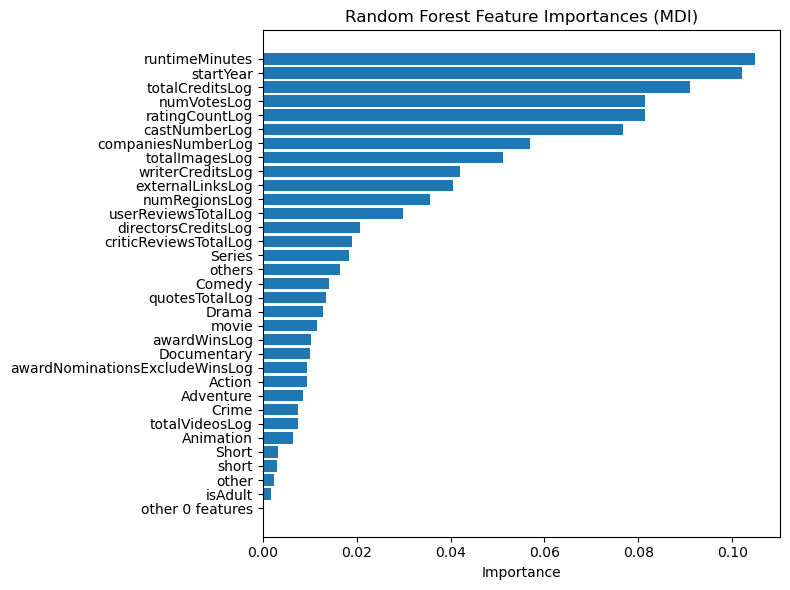

In [64]:
nbr_features = 32  # top N features

# Get feature importances
tree_feature_importances = clf.feature_importances_
attributes = np.array(attributes)  # ensure it's a NumPy array for indexing

# Get indices of top N features
top_idx = tree_feature_importances.argsort()[-nbr_features:][::-1]
other_idx = np.setdiff1d(np.arange(len(tree_feature_importances)), top_idx)

# Calculate "Others" importance
others_importance = tree_feature_importances[other_idx].sum()

# Combine top importances with "Others"
combined_importances = np.append(tree_feature_importances[top_idx], others_importance)
combined_labels = np.append(attributes[top_idx], "other {} features".format(len(attributes)-nbr_features))

# Plot
y_ticks = np.arange(len(combined_labels))
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(y_ticks, combined_importances)
ax.set_yticks(y_ticks)
ax.set_yticklabels(combined_labels)
ax.invert_yaxis()  # highest importance at the top
plt.title("Random Forest Feature Importances (MDI)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

## Gruppata

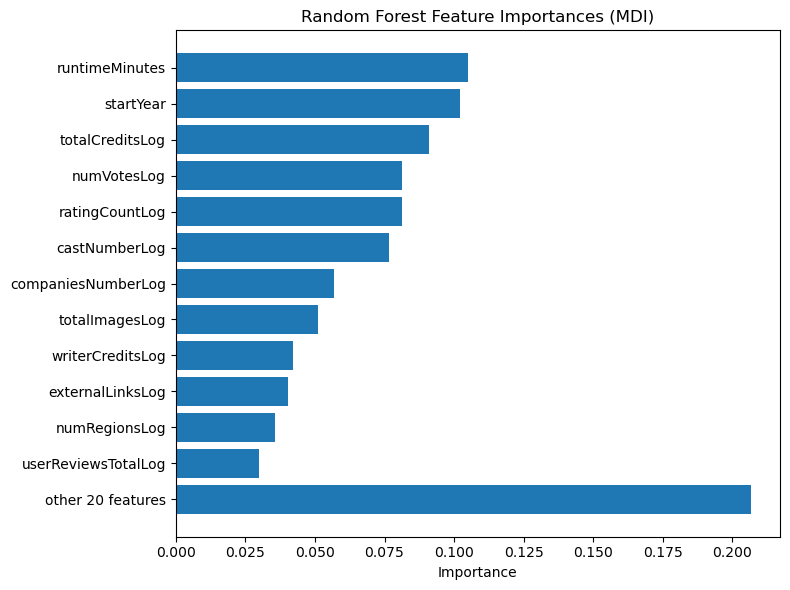

In [68]:
nbr_features = 12  # top N features

# Get feature importances
tree_feature_importances = clf.feature_importances_
attributes = np.array(attributes)  # ensure it's a NumPy array for indexing

# Get indices of top N features
top_idx = tree_feature_importances.argsort()[-nbr_features:][::-1]
other_idx = np.setdiff1d(np.arange(len(tree_feature_importances)), top_idx)

# Calculate "Others" importance
others_importance = tree_feature_importances[other_idx].sum()

# Combine top importances with "Others"
combined_importances = np.append(tree_feature_importances[top_idx], others_importance)
combined_labels = np.append(attributes[top_idx], "other {} features".format(len(attributes)-nbr_features))

# Plot
y_ticks = np.arange(len(combined_labels))
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(y_ticks, combined_importances)
ax.set_yticks(y_ticks)
ax.set_yticklabels(combined_labels)
ax.invert_yaxis()  # highest importance at the top
plt.title("Random Forest Feature Importances (MDI)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [70]:
from sklearn.inspection import permutation_importance

In [72]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

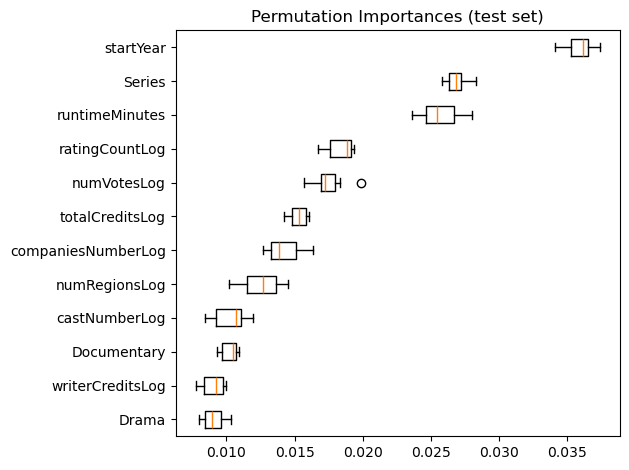

In [74]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(attributes)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

## Grid Search

In [78]:
from sklearn.model_selection import GridSearchCV

In [96]:
param_list = {'min_samples_split': [ 5, 10, 20 ],
              'criterion': ['gini','entropy']
             }
clf = RandomForestClassifier(random_state=42,max_depth=None)
grid_search = GridSearchCV(clf, param_grid=param_list, cv=5,n_jobs=-1)
grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_
print("best score: ",grid_search.best_score_)
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

best score:  0.43737162368665033
Accuracy 0.4366919304502898
F1-score [0.20118011 0.32436838 0.42447074 0.56315505 0.29723167 0.18169492
 0.17829051]
              precision    recall  f1-score   support

           4       0.41      0.13      0.20      2688
           5       0.38      0.29      0.32      6279
           6       0.41      0.44      0.42     11696
           7       0.47      0.71      0.56     14657
           8       0.42      0.23      0.30      6677
           9       0.68      0.10      0.18      1278
         <=3       0.53      0.11      0.18      1585

    accuracy                           0.44     44860
   macro avg       0.47      0.29      0.31     44860
weighted avg       0.44      0.44      0.41     44860



In [100]:
grid_search.best_score_

0.43737162368665033

In [13]:
#best_random =  grid_search.best_estimator_
best_random =  RandomForestClassifier(n_estimators=100, 
                             criterion='gini', 
                             max_depth=None, 
                             min_samples_split=5, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='sqrt', 
                             random_state=0, 
                             n_jobs=-1)
best_random.fit(X_train, y_train)

# Evaluate the final model on the test set
y_pred_dt = best_random.predict(X_test)
print("\nDecision Tree Classifier Report:")
print(classification_report(y_test, y_pred_dt))




Decision Tree Classifier Report:
              precision    recall  f1-score   support

           4       0.40      0.13      0.19      2688
           5       0.38      0.29      0.33      6279
           6       0.41      0.45      0.43     11696
           7       0.47      0.71      0.56     14657
           8       0.42      0.23      0.30      6677
           9       0.67      0.11      0.18      1278
         <=3       0.53      0.11      0.19      1585

    accuracy                           0.44     44860
   macro avg       0.47      0.29      0.31     44860
weighted avg       0.44      0.44      0.41     44860



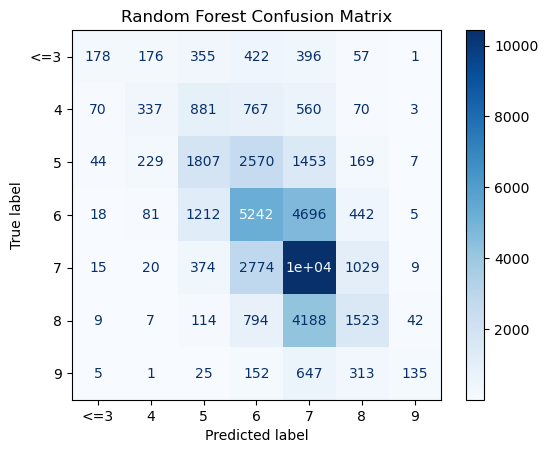

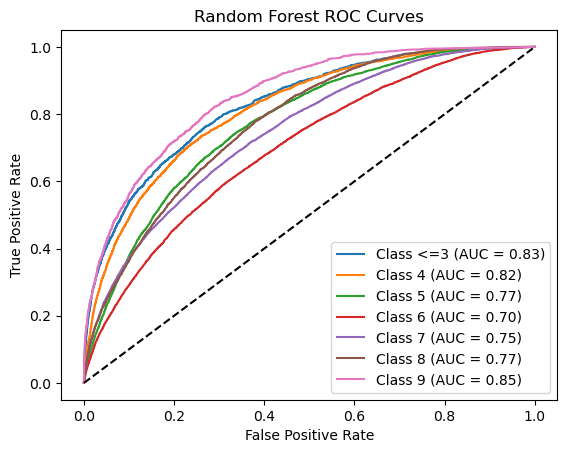

In [15]:
# Define desired label order
ordered_classes = ['<=3', '4', '5', '6', '7', '8', '9']

# --- CONFUSION MATRIX ---
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=ordered_classes)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=ordered_classes)
disp_dt.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# --- ROC CURVES ---

# Binarize the true labels according to the ordered classes
y_test_dt_bin = label_binarize(y_test, classes=ordered_classes)

# Get predicted probabilities
y_score_dt = best_dt.predict_proba(X_test)

# Reorder columns of y_score_dt to match ordered_classes
# First, get a mapping from best_dt.classes_ to their indices
class_to_index = {cls: i for i, cls in enumerate(best_dt.classes_)}

# Then, build the reordered score matrix
y_score_dt_ordered = np.column_stack([y_score_dt[:, class_to_index[cls]] for cls in ordered_classes])

# Compute ROC curve and AUC for each class
fpr_dt, tpr_dt, roc_auc_dt = {}, {}, {}
for i, cls in enumerate(ordered_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_dt_bin[:, i], y_score_dt_ordered[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Plot the ROC curves
plt.figure()
for i, cls in enumerate(ordered_classes):
    plt.plot(fpr_dt[i], tpr_dt[i], label=f'Class {cls} (AUC = {roc_auc_dt[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Random Forest ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


## Weighted

In [272]:
# 2. Extract numerical columns dynamically from the training set
attributes = list(np.unique(train_data.select_dtypes(include=['int', 'float64']).columns))

# 3. Remove unwanted one-hot encoded columns and any other non-useful features
unwanted_values = {'rating','averageRating'}
attributes = [attr for attr in attributes if attr not in unwanted_values]
print("Initial numerical features:", attributes)


# 4. Define the feature matrix (X) and target vector (y) for both train and test sets
X_train = train_data[attributes].values
y_train = train_data[target].values

X_test  = test_data[attributes].values
y_test  = test_data[target].values

# 5. Normalize the features using StandardScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

Initial numerical features: ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Series', 'Short', 'awardNominationsExcludeWinsLog', 'awardWinsLog', 'castNumberLog', 'companiesNumberLog', 'criticReviewsTotalLog', 'directorsCreditsLog', 'externalLinksLog', 'isAdult', 'movie', 'numRegionsLog', 'numVotesLog', 'other', 'others', 'quotesTotalLog', 'ratingCountLog', 'runtimeMinutes', 'short', 'startYear', 'totalCreditsLog', 'totalImagesLog', 'totalVideosLog', 'userReviewsTotalLog', 'writerCreditsLog']


In [274]:
clf = RandomForestClassifier(n_estimators=100, 
                             criterion='gini', 
                             max_depth=None, 
                             min_samples_split=5, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='sqrt', 
                             random_state=0, 
                             n_jobs=-1)
weights = np.exp(train_data['numVotesLog'])-1
clf.fit(X_train, y_train, sample_weight=weights)



RandomForestClassifier(min_samples_split=5, n_jobs=-1, random_state=0)

In [275]:
y_pred_dt = clf.predict(X_test)

In [276]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           4       0.40      0.12      0.19      2688
           5       0.38      0.28      0.32      6279
           6       0.41      0.44      0.43     11696
           7       0.46      0.72      0.56     14657
           8       0.43      0.23      0.30      6677
           9       0.68      0.10      0.17      1278
         <=3       0.55      0.09      0.16      1585

    accuracy                           0.44     44860
   macro avg       0.47      0.28      0.30     44860
weighted avg       0.44      0.44      0.41     44860



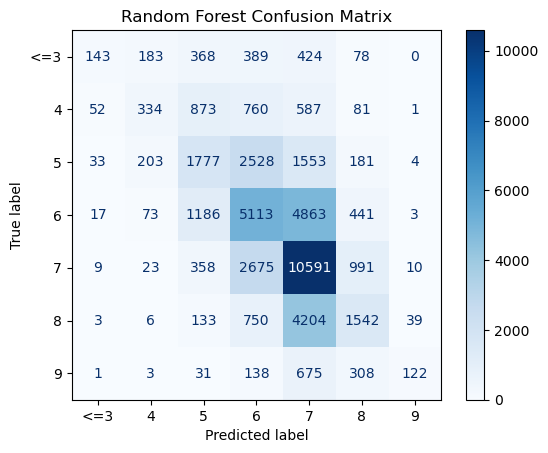

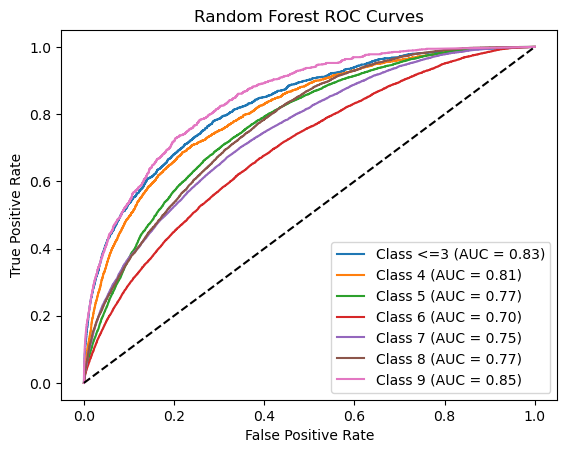

In [277]:
# --- CONFUSION MATRIX ---
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=ordered_classes)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=ordered_classes)
disp_dt.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# --- ROC CURVES ---

# Binarize the true labels according to the ordered classes
y_test_dt_bin = label_binarize(y_test, classes=ordered_classes)

# Get predicted probabilities
y_score_dt = clf.predict_proba(X_test)

# Reorder columns of y_score_dt to match ordered_classes
# First, get a mapping from best_dt.classes_ to their indices
class_to_index = {cls: i for i, cls in enumerate(best_dt.classes_)}

# Then, build the reordered score matrix
y_score_dt_ordered = np.column_stack([y_score_dt[:, class_to_index[cls]] for cls in ordered_classes])

# Compute ROC curve and AUC for each class
fpr_dt, tpr_dt, roc_auc_dt = {}, {}, {}
for i, cls in enumerate(ordered_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_dt_bin[:, i], y_score_dt_ordered[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Plot the ROC curves
plt.figure()
for i, cls in enumerate(ordered_classes):
    plt.plot(fpr_dt[i], tpr_dt[i], label=f'Class {cls} (AUC = {roc_auc_dt[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Random Forest ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


# Bagging

## Con DT

In [103]:
from sklearn.ensemble import BaggingClassifier

In [105]:
clf_bagging = BaggingClassifier(estimator=None, n_estimators=100, 
                        random_state=0)
clf_bagging.fit(X_train, y_train)

y_pred = clf_bagging.predict(X_test)
    
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.42084262148907714
F1-score [0.21545432 0.32085106 0.42045037 0.54076428 0.31450567 0.15227127
 0.19933238]
              precision    recall  f1-score   support

           4       0.33      0.16      0.22      2688
           5       0.34      0.30      0.32      6279
           6       0.40      0.44      0.42     11696
           7       0.47      0.63      0.54     14657
           8       0.37      0.27      0.31      6677
           9       0.42      0.09      0.15      1278
         <=3       0.41      0.13      0.20      1585

    accuracy                           0.42     44860
   macro avg       0.39      0.29      0.31     44860
weighted avg       0.41      0.42      0.40     44860



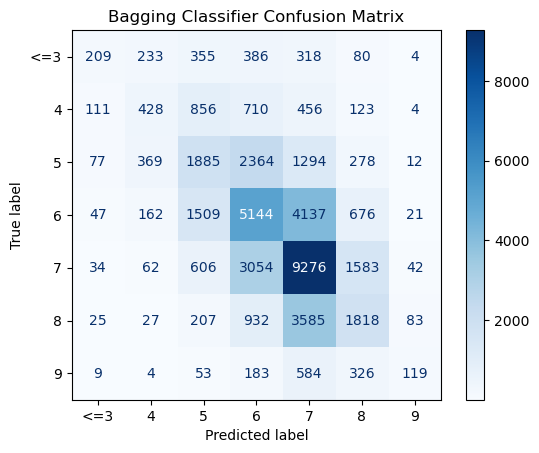

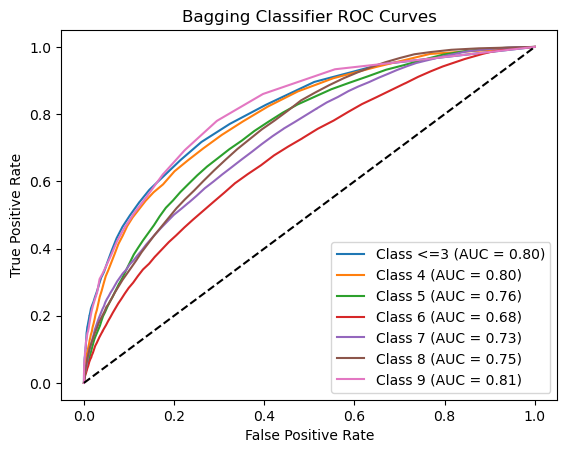

In [121]:
# Use clf_bagging as the best model
best_bag = clf_bagging

# --- CONFUSION MATRIX ---
y_pred_bag = best_bag.predict(X_test)
cm_bag = confusion_matrix(y_test, y_pred_bag, labels=ordered_classes)
disp_bag = ConfusionMatrixDisplay(confusion_matrix=cm_bag, display_labels=ordered_classes)
disp_bag.plot(cmap='Blues')
plt.title("Bagging Classifier Confusion Matrix")
plt.show()

# --- ROC CURVES ---

# Binarize the true labels according to the ordered classes
y_test_bag_bin = label_binarize(y_test, classes=ordered_classes)

# Get predicted probabilities
y_score_bag = best_bag.predict_proba(X_test)

# Reorder columns of y_score_bag to match ordered_classes
class_to_index_bag = {cls: i for i, cls in enumerate(best_bag.classes_)}
y_score_bag_ordered = np.column_stack([y_score_bag[:, class_to_index_bag[cls]] for cls in ordered_classes])

# Compute ROC curve and AUC for each class
fpr_bag, tpr_bag, roc_auc_bag = {}, {}, {}
for i, cls in enumerate(ordered_classes):
    fpr_bag[i], tpr_bag[i], _ = roc_curve(y_test_bag_bin[:, i], y_score_bag_ordered[:, i])
    roc_auc_bag[i] = auc(fpr_bag[i], tpr_bag[i])

# Plot the ROC curves
plt.figure()
for i, cls in enumerate(ordered_classes):
    plt.plot(fpr_bag[i], tpr_bag[i], label=f'Class {cls} (AUC = {roc_auc_bag[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Bagging Classifier ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


## Con LinearSVC

In [123]:
from sklearn.svm import LinearSVC

In [125]:
clf = BaggingClassifier(estimator=LinearSVC(C=1000), 
                        n_estimators=10, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.347347302719572
F1-score [0.         0.067903   0.36251189 0.5051415  0.23222277 0.
 0.        ]


C:\Users\aless\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           4       0.00      0.00      0.00      2688
           5       0.33      0.04      0.07      6279
           6       0.32      0.42      0.36     11696
           7       0.45      0.58      0.51     14657
           8       0.20      0.28      0.23      6677
           9       0.00      0.00      0.00      1278
         <=3       0.00      0.00      0.00      1585

    accuracy                           0.35     44860
   macro avg       0.18      0.19      0.17     44860
weighted avg       0.30      0.35      0.30     44860



C:\Users\aless\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aless\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# AdaBoost

In [17]:
from sklearn.ensemble import AdaBoostClassifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

## Validation ADA con DT

In [66]:
from sklearn.model_selection import train_test_split

In [70]:
X_train_val,X_val, y_train_val,y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=100, stratify=y_train)

### Fisso estimatore DT max_depth 10
Provo a variare Learning Rate e numero estimatori, valuto su un campione del train.

In [72]:
clf_ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10,min_samples_split=5), n_estimators=50, random_state=0,learning_rate=.1)

In [74]:
clf_ada.fit(X_train_val, y_train_val)

y_pred = clf_ada.predict(X_val)


In [75]:
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.4166746388596575
F1-score [0.19354839 0.32087283 0.40156361 0.55056769 0.24705882 0.11176471
 0.13742331]
              precision    recall  f1-score   support

           4       0.39      0.13      0.19      1279
           5       0.35      0.30      0.32      3006
           6       0.39      0.41      0.40      5460
           7       0.45      0.70      0.55      6770
           8       0.37      0.18      0.25      3072
           9       0.47      0.06      0.11       600
         <=3       0.58      0.08      0.14       719

    accuracy                           0.42     20906
   macro avg       0.43      0.27      0.28     20906
weighted avg       0.41      0.42      0.39     20906



In [76]:
clf_ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10,min_samples_split=5), n_estimators=100, random_state=0,learning_rate=.1)

In [77]:
clf_ada.fit(X_train_val, y_train_val)

y_pred = clf_ada.predict(X_val)

In [78]:
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.4147134793839089
F1-score [0.19733024 0.32897064 0.39864201 0.54461919 0.25745086 0.11577424
 0.15895611]
              precision    recall  f1-score   support

           4       0.38      0.13      0.20      1279
           5       0.35      0.31      0.33      3006
           6       0.39      0.41      0.40      5460
           7       0.45      0.68      0.54      6770
           8       0.37      0.20      0.26      3072
           9       0.44      0.07      0.12       600
         <=3       0.54      0.09      0.16       719

    accuracy                           0.41     20906
   macro avg       0.42      0.27      0.29     20906
weighted avg       0.41      0.41      0.39     20906



In [86]:
clf_ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10,min_samples_split=5), n_estimators=50, random_state=0,learning_rate=.5)

In [88]:
clf_ada.fit(X_train_val, y_train_val)

y_pred = clf_ada.predict(X_val)

In [89]:
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.39237539462355303
F1-score [0.22073922 0.31573256 0.39748217 0.50409272 0.27271045 0.16393443
 0.19978518]
              precision    recall  f1-score   support

           4       0.32      0.17      0.22      1279
           5       0.34      0.29      0.32      3006
           6       0.37      0.43      0.40      5460
           7       0.45      0.57      0.50      6770
           8       0.32      0.24      0.27      3072
           9       0.34      0.11      0.16       600
         <=3       0.44      0.13      0.20       719

    accuracy                           0.39     20906
   macro avg       0.37      0.28      0.30     20906
weighted avg       0.38      0.39      0.38     20906



In [95]:
clf_ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10,min_samples_split=5), n_estimators=50, random_state=0,learning_rate=1)

In [97]:
clf_ada.fit(X_train_val, y_train_val)

y_pred = clf_ada.predict(X_val)

In [98]:
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.3664976561752607
F1-score [0.23601316 0.30735418 0.37562932 0.46169014 0.29252367 0.15267176
 0.14270501]
              precision    recall  f1-score   support

           4       0.30      0.20      0.24      1279
           5       0.31      0.30      0.31      3006
           6       0.35      0.40      0.38      5460
           7       0.44      0.48      0.46      6770
           8       0.29      0.29      0.29      3072
           9       0.32      0.10      0.15       600
         <=3       0.30      0.09      0.14       719

    accuracy                           0.37     20906
   macro avg       0.33      0.27      0.28     20906
weighted avg       0.36      0.37      0.36     20906



In [99]:
clf_ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10,min_samples_split=5), n_estimators=10, random_state=0,learning_rate=1)

In [100]:
clf_ada.fit(X_train_val, y_train_val)

y_pred = clf_ada.predict(X_val)

In [101]:
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.3698459772314168
F1-score [0.23102948 0.27436441 0.36308068 0.49078462 0.27056544 0.12722646
 0.1872428 ]
              precision    recall  f1-score   support

           4       0.30      0.19      0.23      1279
           5       0.29      0.26      0.27      3006
           6       0.35      0.38      0.36      5460
           7       0.44      0.55      0.49      6770
           8       0.29      0.25      0.27      3072
           9       0.27      0.08      0.13       600
         <=3       0.36      0.13      0.19       719

    accuracy                           0.37     20906
   macro avg       0.33      0.26      0.28     20906
weighted avg       0.36      0.37      0.36     20906



Noto che il migliore risultato è stato ottenuto con Learning rate 0.1 e aumentare stimatori non ha migliorato performance

### Aumento Depth DT

In [108]:
clf_ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=15,min_samples_split=5), n_estimators=50, random_state=0,learning_rate=.1)

In [110]:
clf_ada.fit(X_train_val, y_train_val)

y_pred = clf_ada.predict(X_val)

In [111]:
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.4259542715010045
F1-score [0.22824388 0.33794432 0.41630483 0.54470632 0.31745412 0.22363405
 0.21684211]
              precision    recall  f1-score   support

           4       0.34      0.17      0.23      1279
           5       0.36      0.32      0.34      3006
           6       0.40      0.43      0.42      5460
           7       0.47      0.65      0.54      6770
           8       0.40      0.26      0.32      3072
           9       0.47      0.15      0.22       600
         <=3       0.45      0.14      0.22       719

    accuracy                           0.43     20906
   macro avg       0.41      0.30      0.33     20906
weighted avg       0.42      0.43      0.41     20906



In [116]:
clf_ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=15,min_samples_split=5), n_estimators=10, random_state=0,learning_rate=.1)

In [118]:
clf_ada.fit(X_train_val, y_train_val)

y_pred = clf_ada.predict(X_val)

In [119]:
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.42236678465512295
F1-score [0.20643729 0.32813054 0.40738061 0.55129657 0.27747822 0.21092757
 0.19527897]
              precision    recall  f1-score   support

           4       0.36      0.15      0.21      1279
           5       0.35      0.31      0.33      3006
           6       0.40      0.41      0.41      5460
           7       0.46      0.68      0.55      6770
           8       0.38      0.22      0.28      3072
           9       0.44      0.14      0.21       600
         <=3       0.43      0.13      0.20       719

    accuracy                           0.42     20906
   macro avg       0.40      0.29      0.31     20906
weighted avg       0.41      0.42      0.40     20906



In [122]:
clf_ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=15,min_samples_split=5), n_estimators=5, random_state=0,learning_rate=.1)

In [124]:
clf_ada.fit(X_train_val, y_train_val)

y_pred = clf_ada.predict(X_val)

In [125]:
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.4089735004304984
F1-score [0.21041557 0.32785183 0.38433043 0.54331311 0.24510858 0.1813602
 0.16043956]
              precision    recall  f1-score   support

           4       0.32      0.16      0.21      1279
           5       0.34      0.32      0.33      3006
           6       0.39      0.38      0.38      5460
           7       0.45      0.68      0.54      6770
           8       0.36      0.19      0.25      3072
           9       0.37      0.12      0.18       600
         <=3       0.38      0.10      0.16       719

    accuracy                           0.41     20906
   macro avg       0.37      0.28      0.29     20906
weighted avg       0.39      0.41      0.38     20906



In [128]:
clf_ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=15,min_samples_split=5), n_estimators=5, random_state=0,learning_rate=.5)

In [130]:
clf_ada.fit(X_train_val, y_train_val)

y_pred = clf_ada.predict(X_val)

In [131]:
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.3933798909403999
F1-score [0.18866031 0.32271256 0.3821362  0.51481289 0.29547115 0.17892157
 0.18544367]
              precision    recall  f1-score   support

           4       0.26      0.15      0.19      1279
           5       0.33      0.32      0.32      3006
           6       0.37      0.39      0.38      5460
           7       0.46      0.59      0.51      6770
           8       0.34      0.26      0.30      3072
           9       0.34      0.12      0.18       600
         <=3       0.33      0.13      0.19       719

    accuracy                           0.39     20906
   macro avg       0.35      0.28      0.30     20906
weighted avg       0.38      0.39      0.38     20906



Risultati leggermente migliori, sembrano sufficienti 10 estimatori.

### DT a bassa profondità

In [135]:
clf_ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=100, random_state=0,learning_rate=.5)

In [137]:
clf_ada.fit(X_train_val, y_train_val)

y_pred = clf_ada.predict(X_val)

In [138]:
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.3794604419783794
F1-score [0.05179856 0.3008116  0.34287282 0.53158926 0.07560137 0.
 0.        ]
              precision    recall  f1-score   support

           4       0.32      0.03      0.05      1279
           5       0.31      0.29      0.30      3006
           6       0.34      0.34      0.34      5460
           7       0.41      0.74      0.53      6770
           8       0.31      0.04      0.08      3072
           9       0.00      0.00      0.00       600
         <=3       0.00      0.00      0.00       719

    accuracy                           0.38     20906
   macro avg       0.24      0.21      0.19     20906
weighted avg       0.33      0.38      0.32     20906



C:\Users\aless\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aless\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aless\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [139]:
clf_ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=100, random_state=0,learning_rate=1)

In [140]:
clf_ada.fit(X_train_val, y_train_val)

y_pred = clf_ada.predict(X_val)

In [141]:
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.3733856309193533
F1-score [0.08327826 0.29155556 0.32078022 0.5266056  0.13389121 0.03252033
 0.0185923 ]
              precision    recall  f1-score   support

           4       0.27      0.05      0.08      1279
           5       0.31      0.27      0.29      3006
           6       0.34      0.30      0.32      5460
           7       0.41      0.73      0.53      6770
           8       0.27      0.09      0.13      3072
           9       0.67      0.02      0.03       600
         <=3       0.21      0.01      0.02       719

    accuracy                           0.37     20906
   macro avg       0.35      0.21      0.20     20906
weighted avg       0.35      0.37      0.32     20906



In [157]:
clf_ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=200, random_state=0,learning_rate=1)

In [159]:
clf_ada.fit(X_train_val, y_train_val)

y_pred = clf_ada.predict(X_val)

In [160]:
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.3722854682866163
F1-score [0.07539683 0.29380652 0.32246445 0.52698756 0.13021619 0.06557377
 0.02933333]
              precision    recall  f1-score   support

           4       0.24      0.04      0.08      1279
           5       0.30      0.29      0.29      3006
           6       0.33      0.31      0.32      5460
           7       0.42      0.72      0.53      6770
           8       0.29      0.08      0.13      3072
           9       0.31      0.04      0.07       600
         <=3       0.35      0.02      0.03       719

    accuracy                           0.37     20906
   macro avg       0.32      0.21      0.21     20906
weighted avg       0.34      0.37      0.32     20906



### DT max_depth None, senza limiti split

In [151]:
clf_ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=None), n_estimators=10, random_state=0,learning_rate=1)

In [153]:
clf_ada.fit(X_train_val, y_train_val)

y_pred = clf_ada.predict(X_val)

In [154]:
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.4101693293791256
F1-score [0.24368231 0.32776371 0.39813987 0.52302429 0.34976648 0.27564103
 0.25237684]
              precision    recall  f1-score   support

           4       0.29      0.21      0.24      1279
           5       0.33      0.32      0.33      3006
           6       0.39      0.41      0.40      5460
           7       0.49      0.56      0.52      6770
           8       0.37      0.33      0.35      3072
           9       0.38      0.21      0.28       600
         <=3       0.33      0.20      0.25       719

    accuracy                           0.41     20906
   macro avg       0.37      0.32      0.34     20906
weighted avg       0.40      0.41      0.40     20906



In [163]:
clf_ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=None), n_estimators=10, random_state=0,learning_rate=.1)

In [165]:
clf_ada.fit(X_train_val, y_train_val)

y_pred = clf_ada.predict(X_val)

In [166]:
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.37137663828565964
F1-score [0.20190024 0.28923805 0.36860317 0.48643187 0.32612967 0.24421832
 0.19552239]
              precision    recall  f1-score   support

           4       0.20      0.20      0.20      1279
           5       0.29      0.28      0.29      3006
           6       0.37      0.37      0.37      5460
           7       0.48      0.50      0.49      6770
           8       0.33      0.32      0.33      3072
           9       0.27      0.22      0.24       600
         <=3       0.21      0.18      0.20       719

    accuracy                           0.37     20906
   macro avg       0.31      0.30      0.30     20906
weighted avg       0.37      0.37      0.37     20906



In [169]:
clf_ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=None), n_estimators=50, random_state=0,learning_rate=.1)

In [171]:
clf_ada.fit(X_train_val, y_train_val)

y_pred = clf_ada.predict(X_val)

In [172]:
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.39644121304888547
F1-score [0.23187184 0.30699931 0.38104747 0.51410917 0.34196185 0.2892562
 0.2247191 ]
              precision    recall  f1-score   support

           4       0.25      0.22      0.23      1279
           5       0.32      0.29      0.31      3006
           6       0.38      0.38      0.38      5460
           7       0.48      0.55      0.51      6770
           8       0.36      0.33      0.34      3072
           9       0.38      0.23      0.29       600
         <=3       0.27      0.19      0.22       719

    accuracy                           0.40     20906
   macro avg       0.35      0.31      0.33     20906
weighted avg       0.39      0.40      0.39     20906



In [173]:
clf_ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=None), n_estimators=50, random_state=0,learning_rate=.5)

In [174]:
clf_ada.fit(X_train_val, y_train_val)

y_pred = clf_ada.predict(X_val)

In [175]:
print('Accuracy %s' % accuracy_score(y_val, y_pred))
print('F1-score %s' % f1_score(y_val, y_pred, average=None))
print(classification_report(y_val, y_pred))

Accuracy 0.41887496412513153
F1-score [0.23277467 0.33539095 0.39949861 0.53627425 0.35598935 0.28159645
 0.24581006]
              precision    recall  f1-score   support

           4       0.29      0.20      0.23      1279
           5       0.35      0.33      0.34      3006
           6       0.39      0.41      0.40      5460
           7       0.49      0.60      0.54      6770
           8       0.39      0.33      0.36      3072
           9       0.42      0.21      0.28       600
         <=3       0.37      0.18      0.25       719

    accuracy                           0.42     20906
   macro avg       0.39      0.32      0.34     20906
weighted avg       0.41      0.42      0.41     20906



Il  migliore risultato ottenuto per accuracy è 42% con due configurazioni. Anche rispetto agli altri parametri sono piuttosto simili, perciò prendo soluzione più semplice con 10 estimatori.

## Applicazione al test

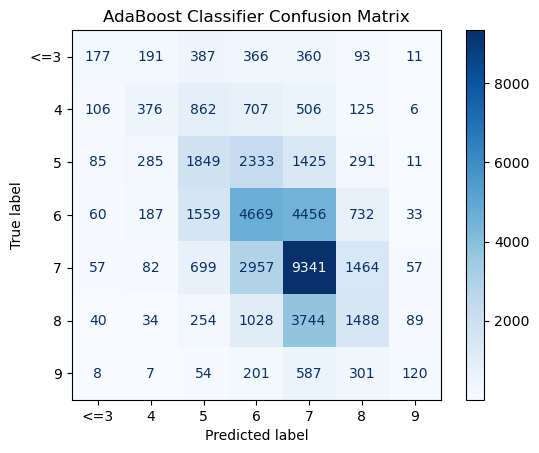

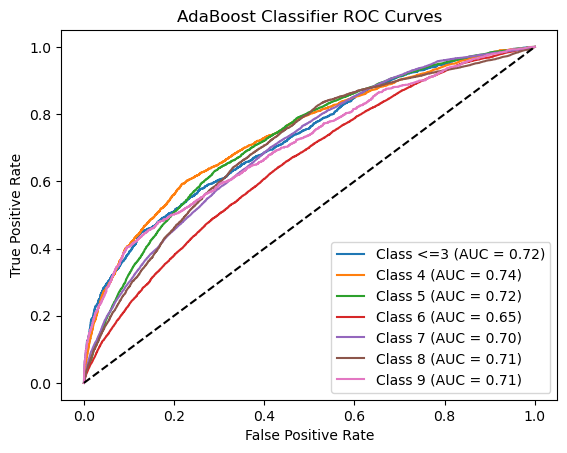

In [185]:
# Use clf_ada as the best model
best_ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=15,min_samples_split=5), n_estimators=10, random_state=0,learning_rate=.1)
best_ada.fit(X_train,y_train)
# --- CONFUSION MATRIX ---
y_pred_ada = best_ada.predict(X_test)
cm_ada = confusion_matrix(y_test, y_pred_ada, labels=ordered_classes)
disp_ada = ConfusionMatrixDisplay(confusion_matrix=cm_ada, display_labels=ordered_classes)
disp_ada.plot(cmap='Blues')
plt.title("AdaBoost Classifier Confusion Matrix")
plt.show()

# --- ROC CURVES ---

# Binarize the true labels according to the ordered classes
y_test_ada_bin = label_binarize(y_test, classes=ordered_classes)

# Get predicted probabilities
y_score_ada = best_ada.predict_proba(X_test)

# Reorder columns of y_score_ada to match ordered_classes
class_to_index_ada = {cls: i for i, cls in enumerate(best_ada.classes_)}
y_score_ada_ordered = np.column_stack([y_score_ada[:, class_to_index_ada[cls]] for cls in ordered_classes])

# Compute ROC curve and AUC for each class
fpr_ada, tpr_ada, roc_auc_ada = {}, {}, {}
for i, cls in enumerate(ordered_classes):
    fpr_ada[i], tpr_ada[i], _ = roc_curve(y_test_ada_bin[:, i], y_score_ada_ordered[:, i])
    roc_auc_ada[i] = auc(fpr_ada[i], tpr_ada[i])

# Plot the ROC curves
plt.figure()
for i, cls in enumerate(ordered_classes):
    plt.plot(fpr_ada[i], tpr_ada[i], label=f'Class {cls} (AUC = {roc_auc_ada[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("AdaBoost Classifier ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


In [187]:
print('Accuracy %s' % accuracy_score(y_test, y_pred_ada))
print('F1-score %s' % f1_score(y_test, y_pred_ada, average=None))
print(classification_report(y_test, y_pred_ada))

Accuracy 0.4016941596076683
F1-score [0.19532468 0.30963744 0.38978169 0.53261489 0.26640408 0.14953271
 0.16713881]
              precision    recall  f1-score   support

           4       0.32      0.14      0.20      2688
           5       0.33      0.29      0.31      6279
           6       0.38      0.40      0.39     11696
           7       0.46      0.64      0.53     14657
           8       0.33      0.22      0.27      6677
           9       0.37      0.09      0.15      1278
         <=3       0.33      0.11      0.17      1585

    accuracy                           0.40     44860
   macro avg       0.36      0.27      0.29     44860
weighted avg       0.39      0.40      0.38     44860

